# Fast Autodistill: Auto-labeling, Training, and Inference in <20 Minutes

This Jupyter notebook evaluates the speed and efficiency of Autodistill, a framework designed for auto-labeling, training, and inference tasks in computer vision. Autodistill eliminates the manual labeling of training data, enabling the development of computer vision models quickly and effortlessly. We demonstrate its capability to perform auto-labeling, training, and inference in under 20 minutes, thereby significantly reducing the time and effort required for building robust computer vision models.

## Installation and Setup

In [ ]:

from autodistill.detection import CaptionOntology
from autodistill_detic import DETIC
from autodistill_yolov8 import YOLOv8
from IPython.display import Image
import os
os.environ['MKL_THREADING_LAYER'] = 'GNU'

## Import Dataset

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="QPtFXk2KR0s5bGzha4lM")
project = rf.workspace("ccu-uyhaz").project("plane_detect")
dataset = project.version(3).download("yolov8")

## Initialize Base Model and Autolabel

In [ ]:
base_model = DETIC(ontology=CaptionOntology({"Airplane": "Airplane"}))

In [ ]:
base_model.label(dataset.location + "/train/images", extension=".jpg")

## Initialize Target Model and Train

In [ ]:
target_model = YOLOv8("yolov8n.pt")
target_model.train(dataset.location +
                   "/train/images_labeled/data.yaml", epochs=100)

## Visualize the Results

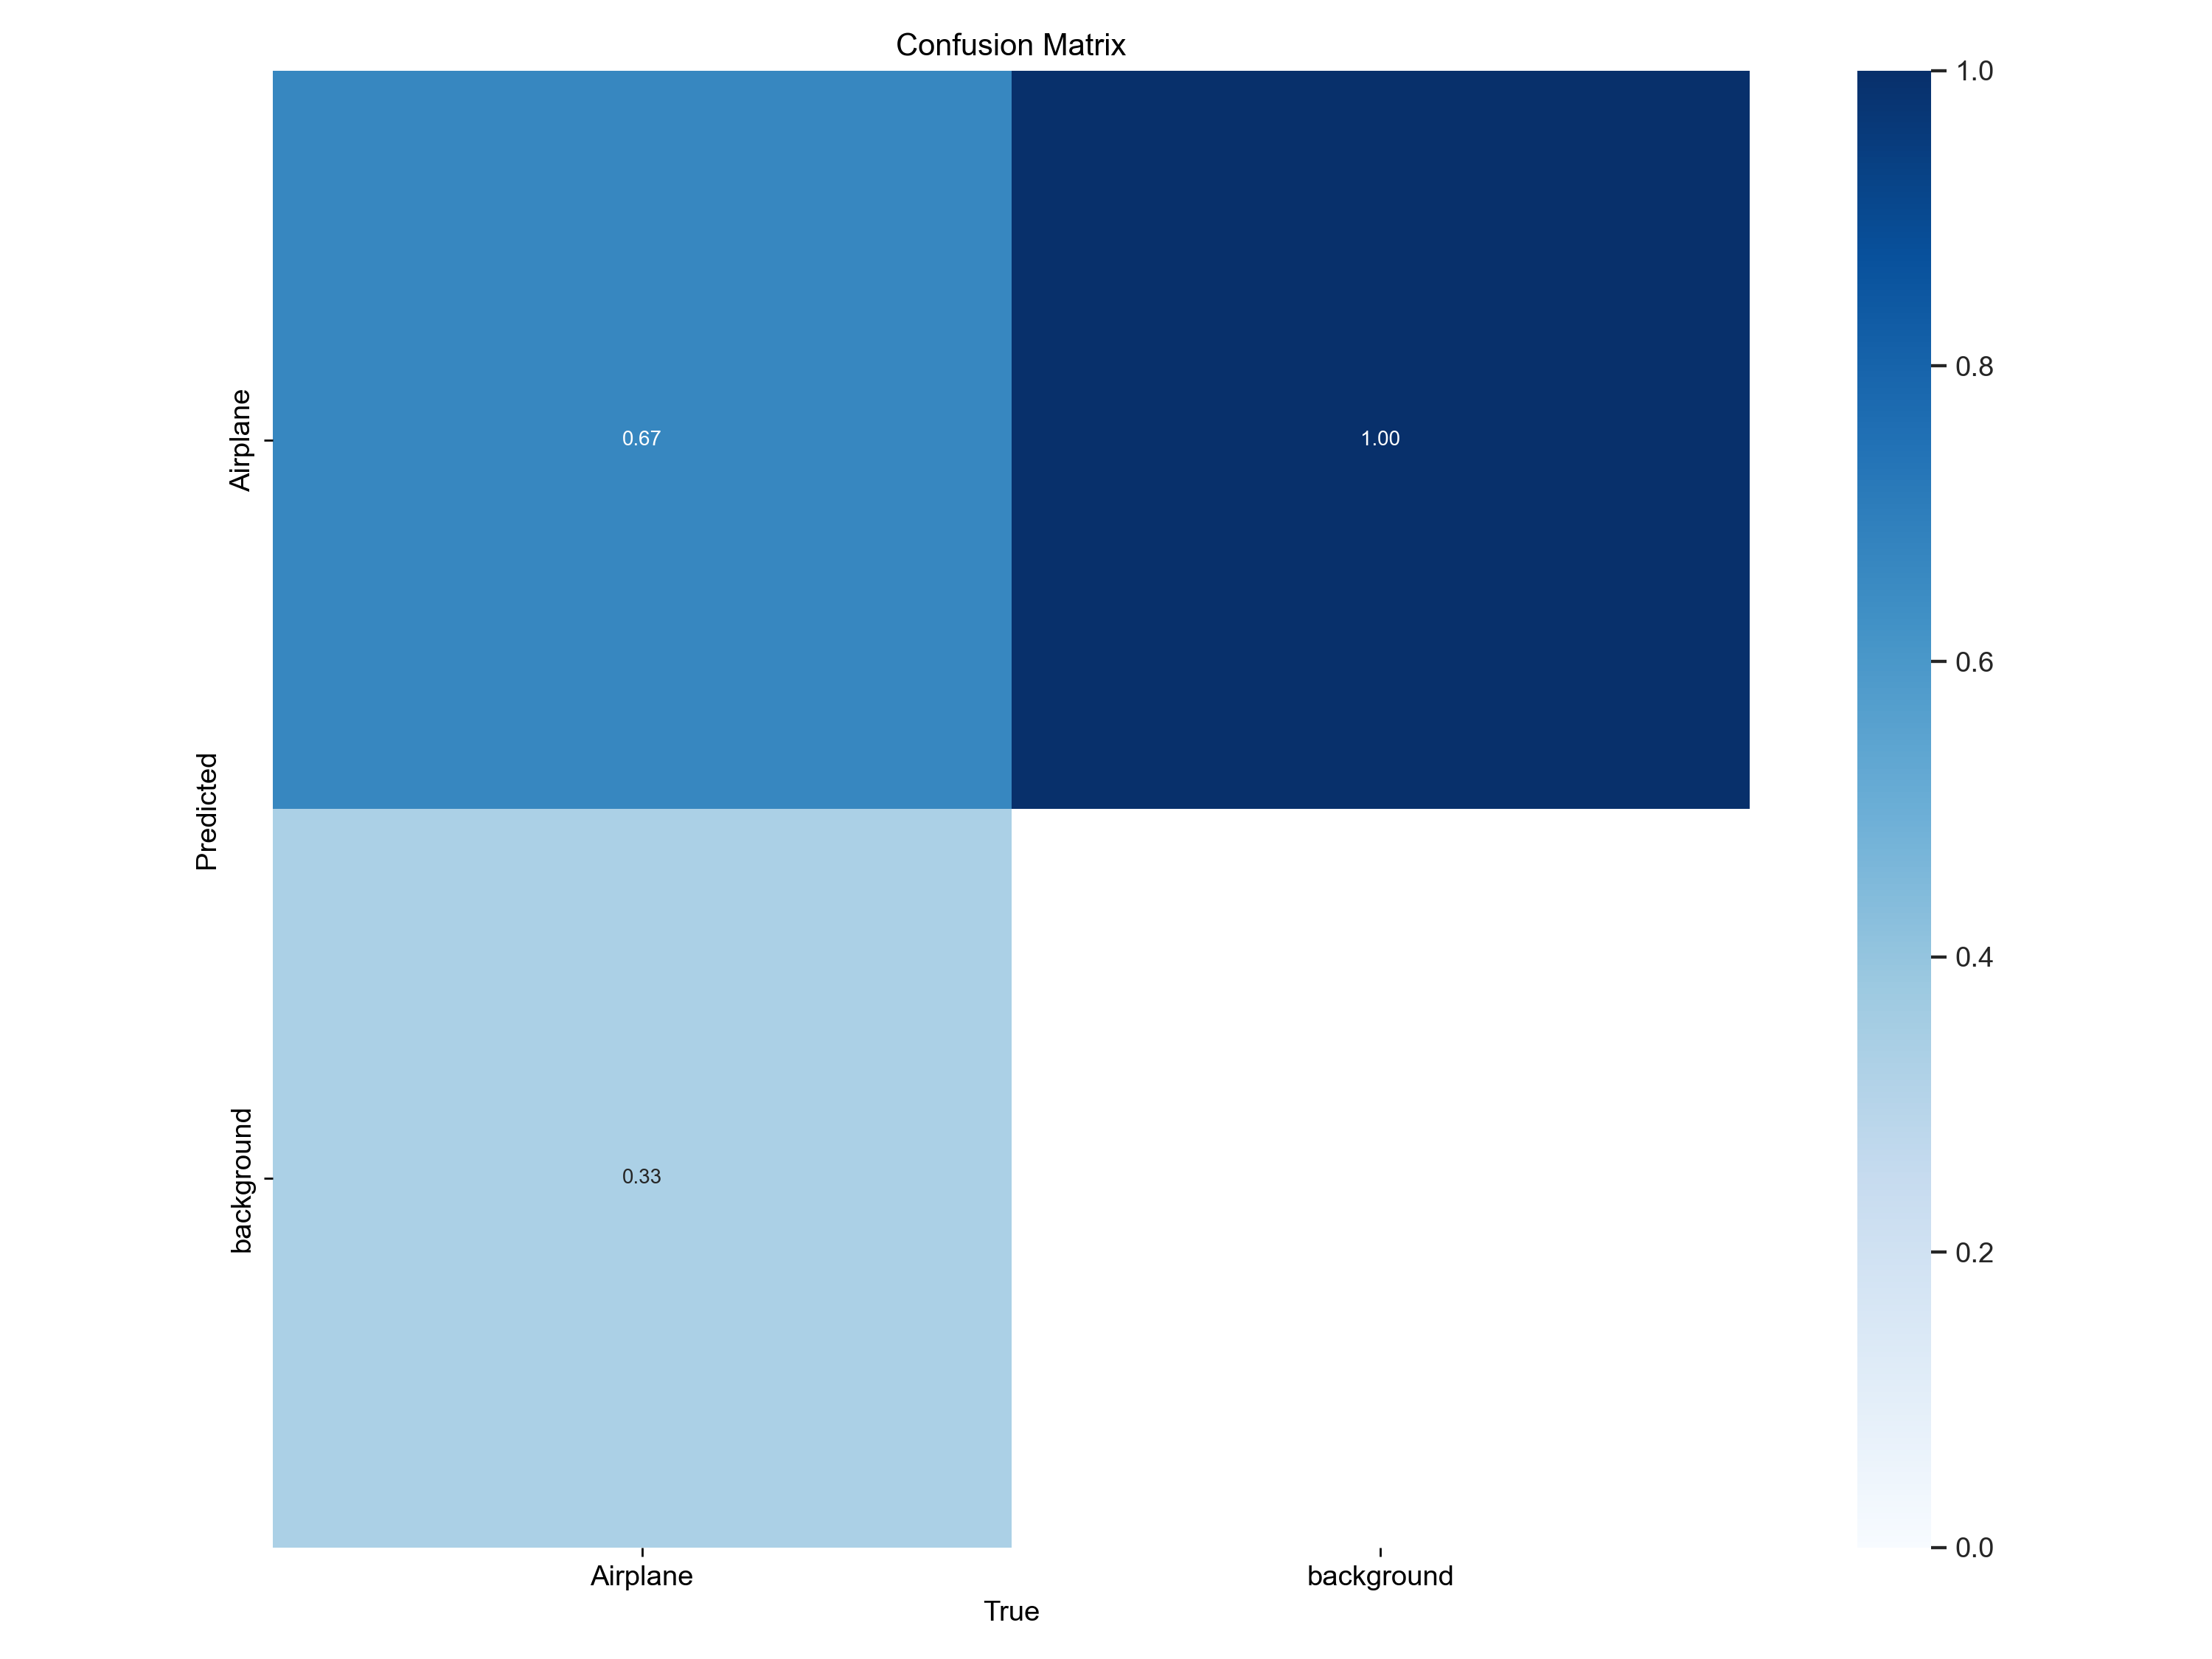

In [11]:

Image(filename='./runs/detect/train/confusion_matrix.png', width=600)

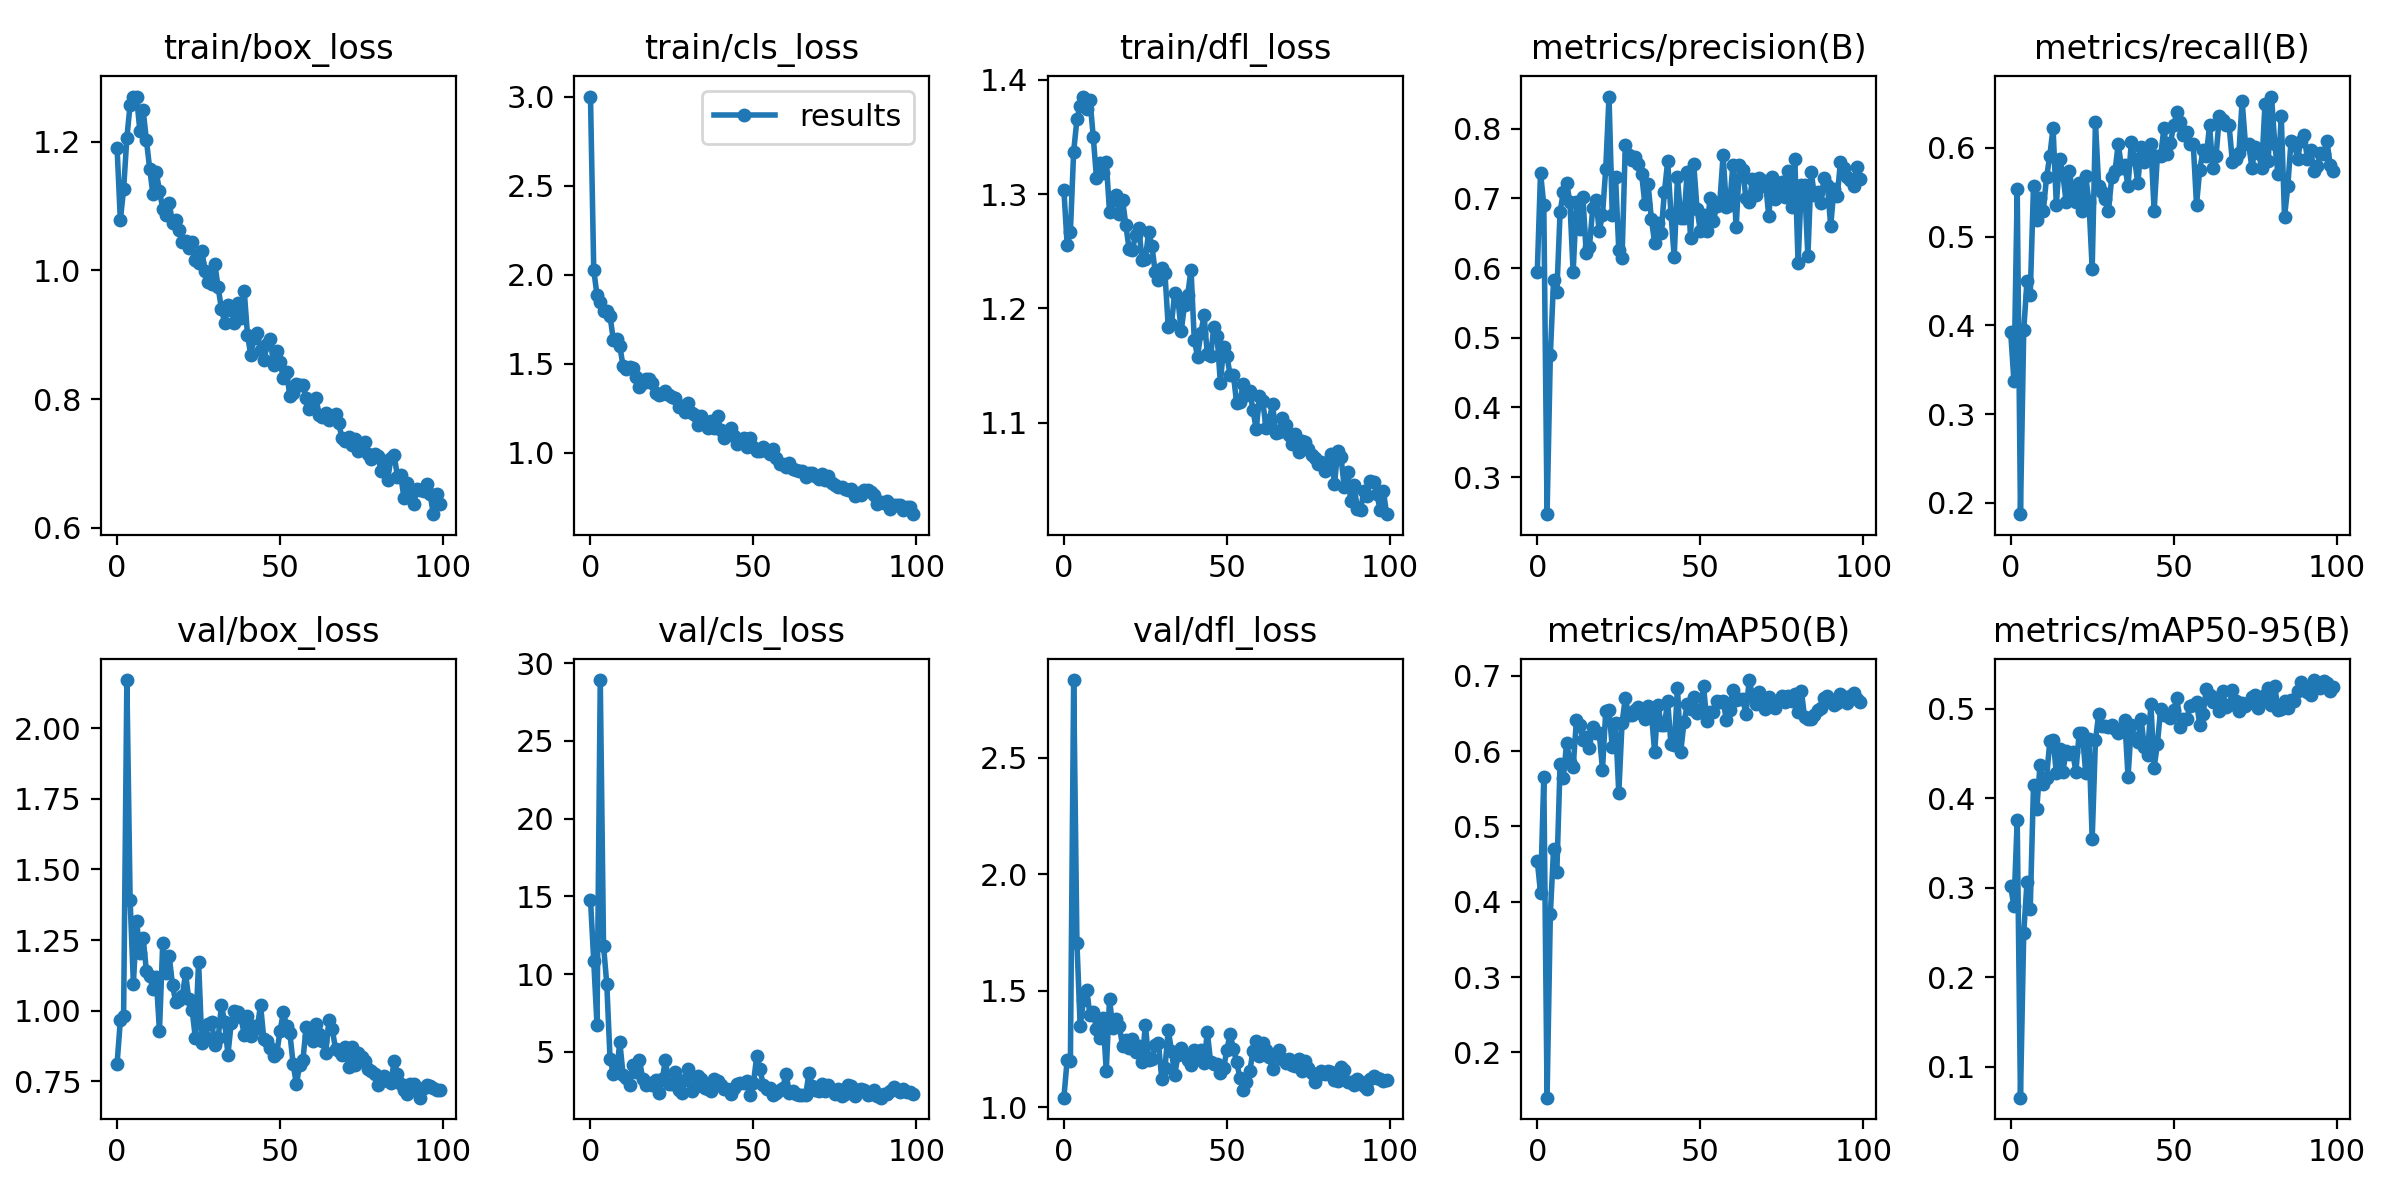

In [12]:
Image(filename='./runs/detect/train/results.png', width=600)

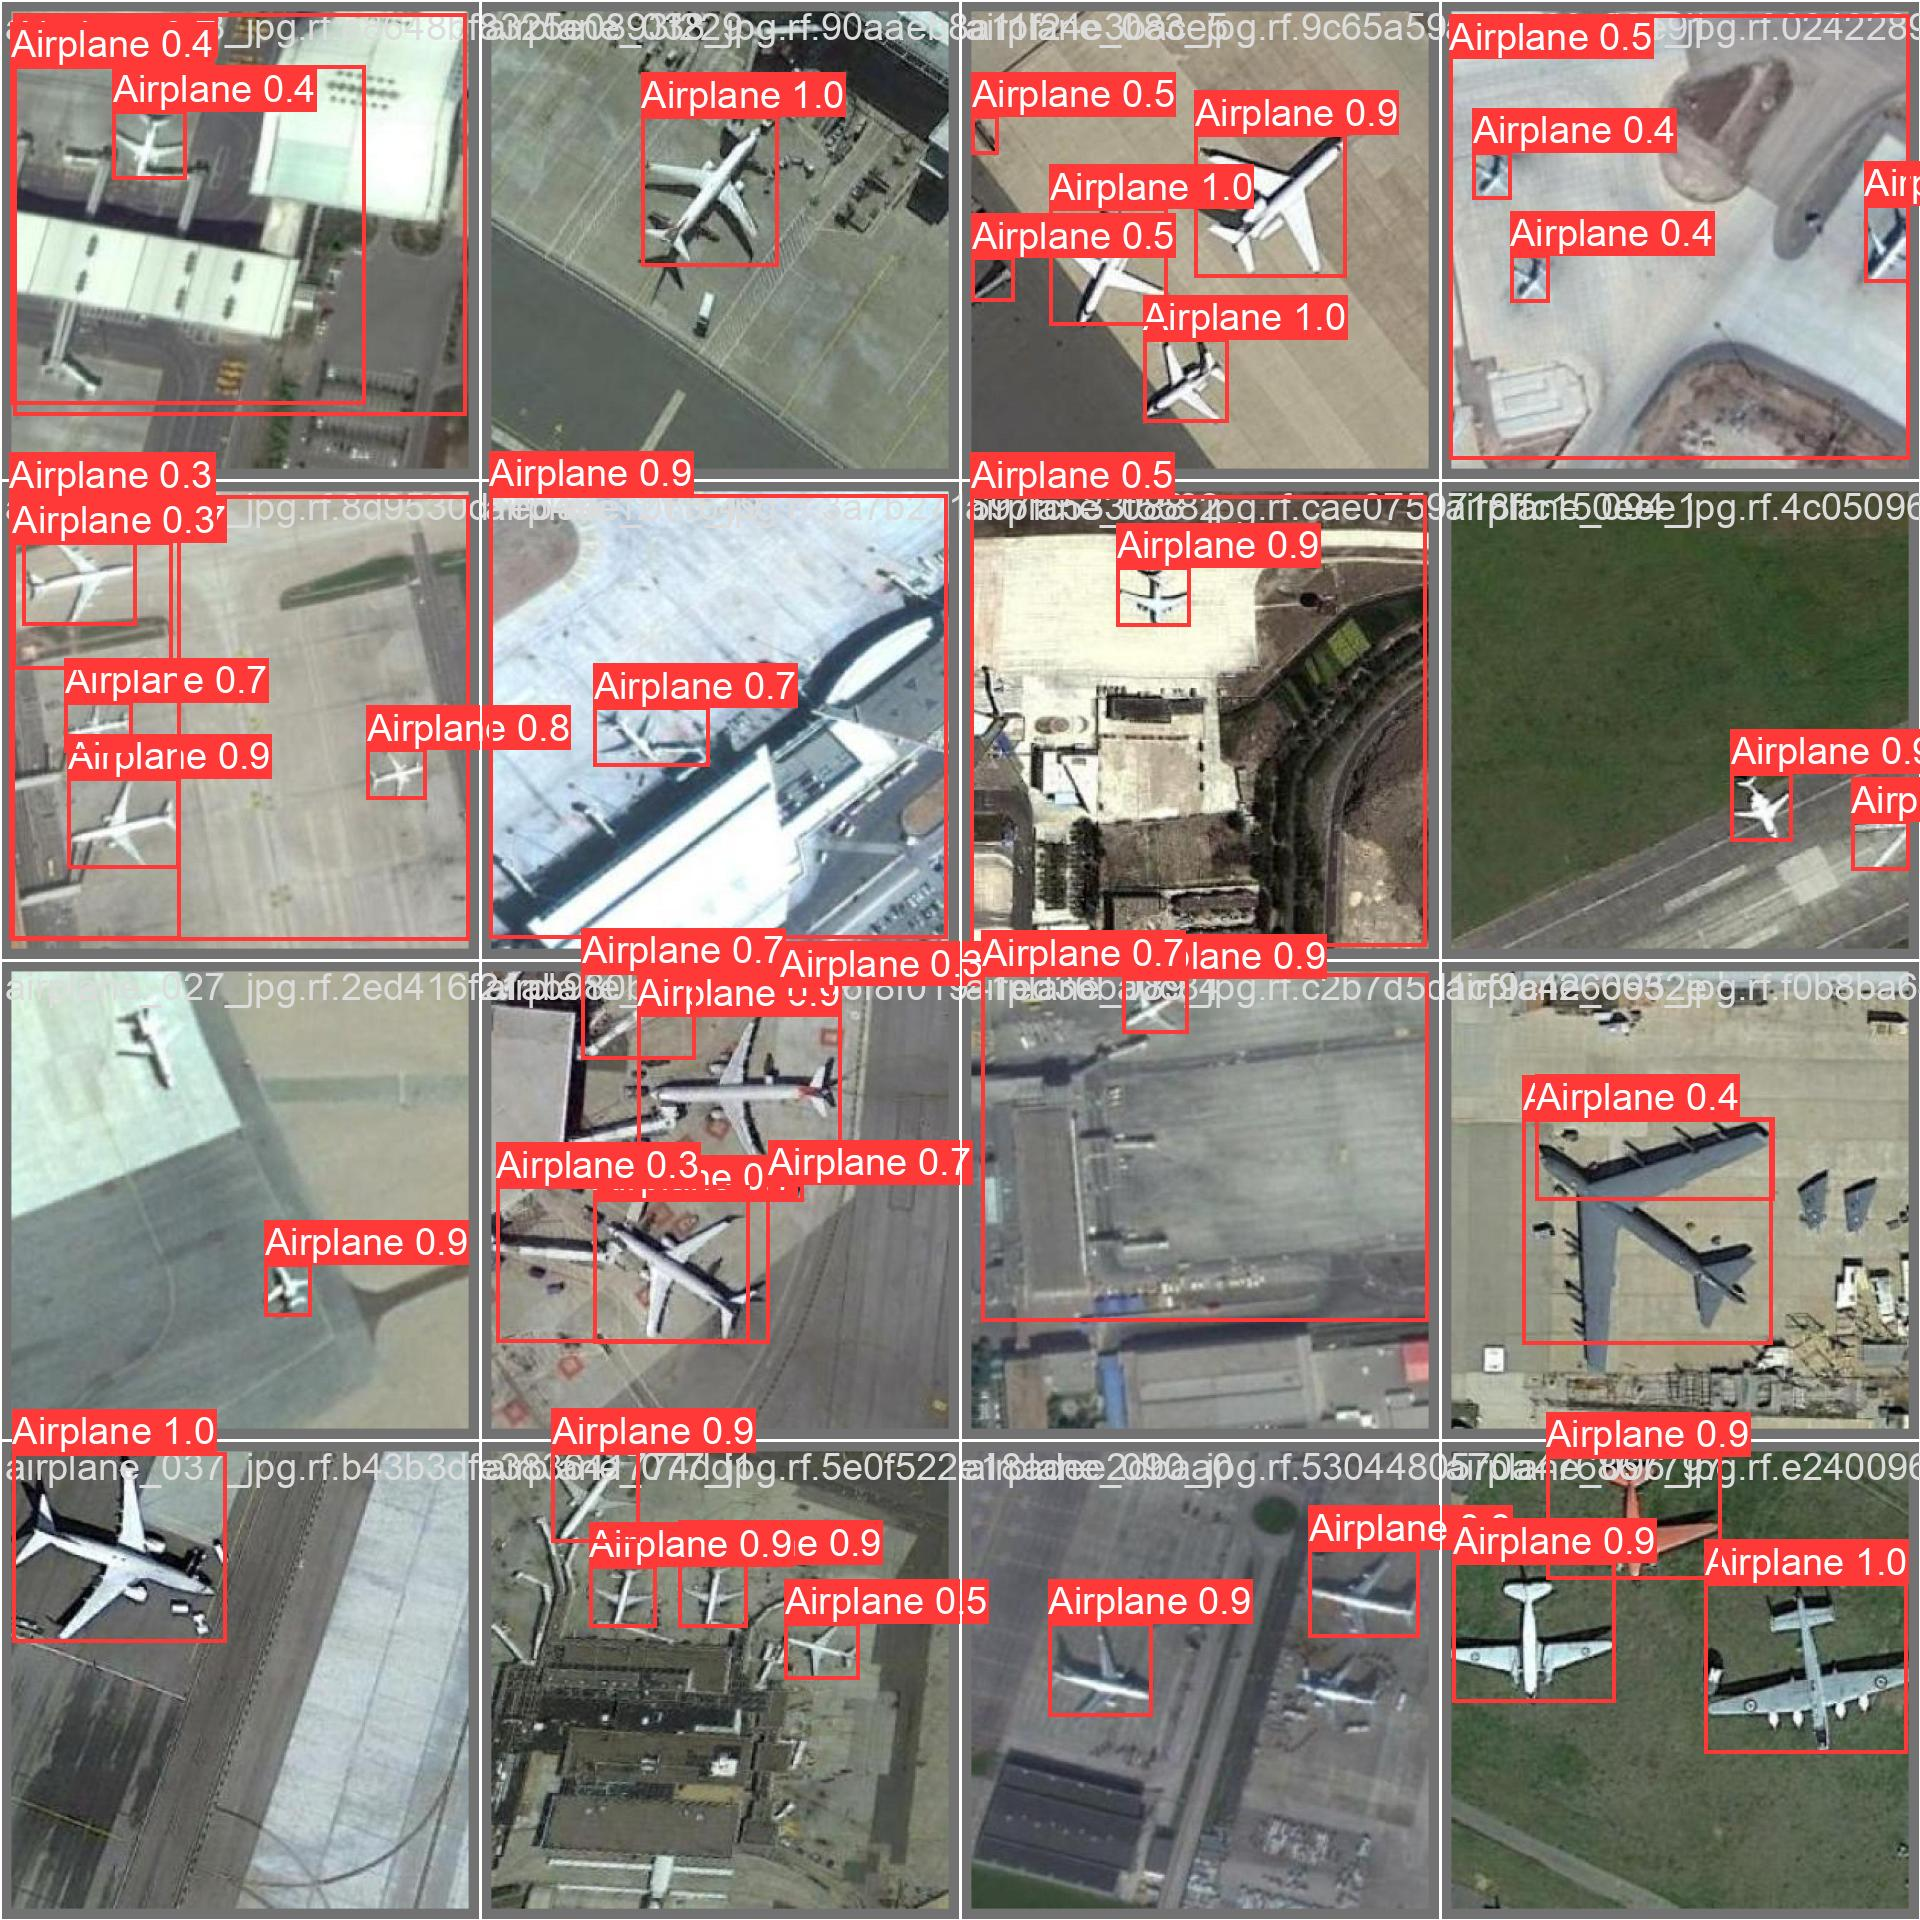

In [13]:
Image(filename='./runs/detect/train/val_batch1_pred.jpg', width=600)